In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
# Load iris data
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use first two features for 2D plot
y = iris.target

# Filter two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

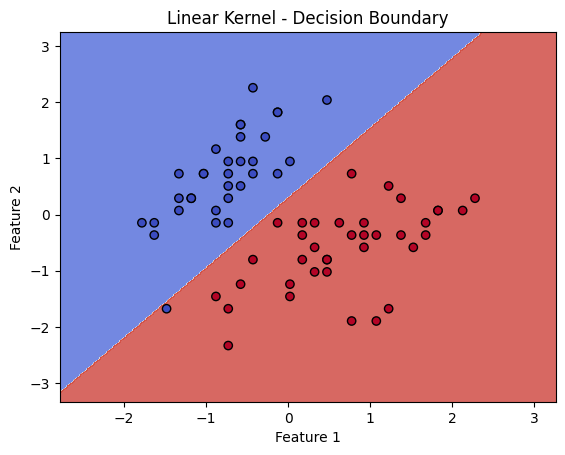

In [3]:
# Train linear SVC
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

# Decision boundary plot
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svc_linear, X_train, y_train, "Linear Kernel - Decision Boundary")


In [4]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

# Accuracy comparison
print("Linear SVC accuracy:", svc_linear.score(X_test, y_test))
print("RBF SVC accuracy:", svc_rbf.score(X_test, y_test))

Linear SVC accuracy: 1.0
RBF SVC accuracy: 1.0


In [5]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 1.0


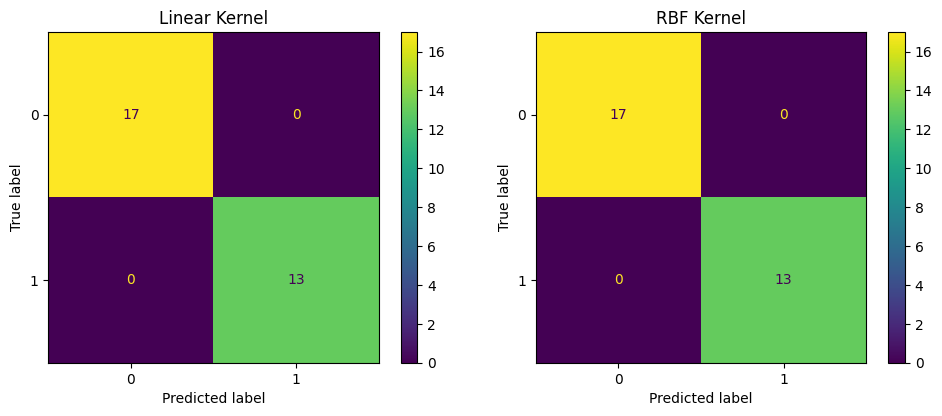

In [6]:
# Predict
y_pred_linear = svc_linear.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, y_pred, title in zip(axes, [y_pred_linear, y_pred_rbf], ["Linear", "RBF"]):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    ax.set_title(f"{title} Kernel")

plt.tight_layout()
plt.show()


Digits Dataset Accuracy: 0.9814814814814815


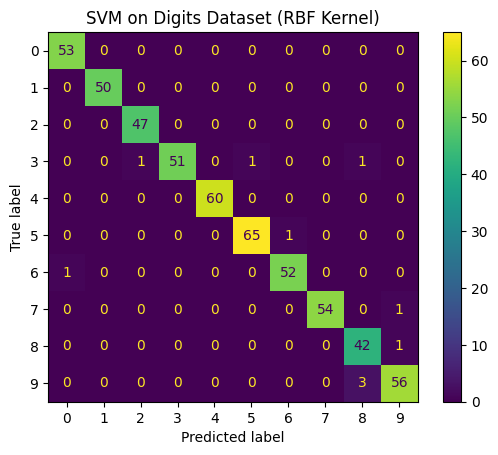

In [7]:
from sklearn.datasets import load_digits

# Load digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Train-test split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

# Scale
scaler_d = StandardScaler()
X_train_d = scaler_d.fit_transform(X_train_d)
X_test_d = scaler_d.transform(X_test_d)

# Train SVM with RBF kernel
svc_digits = SVC(kernel='rbf', gamma=0.001, C=10)
svc_digits.fit(X_train_d, y_train_d)

# Evaluate
y_pred_d = svc_digits.predict(X_test_d)
print("Digits Dataset Accuracy:", accuracy_score(y_test_d, y_pred_d))

# Confusion matrix
cm_digits = confusion_matrix(y_test_d, y_pred_d)
disp_digits = ConfusionMatrixDisplay(confusion_matrix=cm_digits)
disp_digits.plot()
plt.title("SVM on Digits Dataset (RBF Kernel)")
plt.show()
